In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\JARVIS\Downloads\Telegram Desktop\CLT+Demo+Files\application_data.csv")

In [4]:
# Cleaning the missing data
# listing the null values columns having more than 30%
nan=df.isnull().sum()

nan=nan[nan.values>(0.3*len(nan))]
len(nan)
#So, there are 64 columns having null values greater than 30% in the dataset

64

In [5]:
nan = list(nan[nan.values>=0.3].index)
df.drop(labels=nan,axis=1,inplace=True)
print(len(nan))

64


In [6]:
# Checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [7]:

###So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to fill the missing values

###Since this column is having an outlier which is very large it will be bot good to fill those missing values with mean, Hence Median ,those missing banks with median value

In [8]:
values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
..         ...     ...                ...         ...          ...   
95      100113       0         Cash loans           M            Y   
96      100114       0         Cash loans           F            N   
97      100115       0         Cash loans           F            N   
98      100116       0         Cash loans           F            N   
99      100118       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
..             ...           ...               ...         ...          ...   
95               N             0           76500.0    135000.0       6696.0   
96               Y             0          135000.0    284400.0      22599.0   
97               N             0           90000.0    315000.0      14683.5   
98               Y             0          243000.0    900000.0      32017.5   
99               Y             0           90000.0    675000.0      26541.0   

    ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0   ...           -2120                  WEDNESDAY                      10   
1   ...            -291                     MONDAY                      11   
2   ...           -2531                     MONDAY                       9   
3   ...           -2437                  WEDNESDAY                      17   
4   ...           -3458                   THURSDAY                      11   
..  ...             ...                        ...                     ...   
95  ...           -4576                     MONDAY                      10   
96  ...           -1362                     MONDAY                      14   
97  ...           -4211                     SUNDAY                      11   
98  ...           -4788                   THURSDAY                      11   
99  ...           -4323                    TUESDAY                      15   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
..                        ...                         ...   
95                          0                           0   
96                          0                           0   
97                          0                           0   
98                          0                           0   
99                          0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
..                          ...                     ...   
95                            0                       0   
96                            0                       1   
97           

In [9]:

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [10]:
nar=df.isnull().sum(axis=1)
nar=list(nar[nar.values>=0.3*len(df)].index)
df.drop(labels=nar,axis=0,inplace=True)
print(len(nar))

0


In [11]:
# We will remove notgood columns from this dataset
nogood=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=nogood,axis=1,inplace=True)

In [12]:

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

SyntaxError: invalid syntax (<ipython-input-12-c42793d4bf27>, line 1)

In [33]:
df.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [34]:
df.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [39]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [37]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [40]:
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [42]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

# Updating the column 'CODE_GENDER' with "F" for the dataset

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [43]:
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [44]:
# Casting all variable into numeric in the dataset
nc=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[nc]=df[nc].apply(pd.to_numeric)
df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... DAYS_ID_PUBLISH WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0  ...           -2120                  WEDNESDAY                      10   
1  ...            -291                     MONDAY                      11   
2  ...           -2531                     MONDAY                       9   
3  ...           -2437                  WEDNESDAY                      17   
4  ...           -3458                   THURSDAY                      11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  
0                       0                        0  Business Entity Type 3  
1                       0                        0                  School  
2                       0                        0              Government  
3                       0                        0  Business Entity Type 3  
4                       1                        1                Religion  

[5 rows x 28 columns]

In [47]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [48]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
p0_df=df.loc[df["TARGET"]==0]
p1_df=df.loc[df["TARGET"]==1]

In [49]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(p0_df)/len(p1_df),2)


10.55

In [ ]:

The Imbalance ratio is 10.55

Univariate analysis for categories

Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

In [57]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 22
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 30
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='RdGy') 
    plt.show()

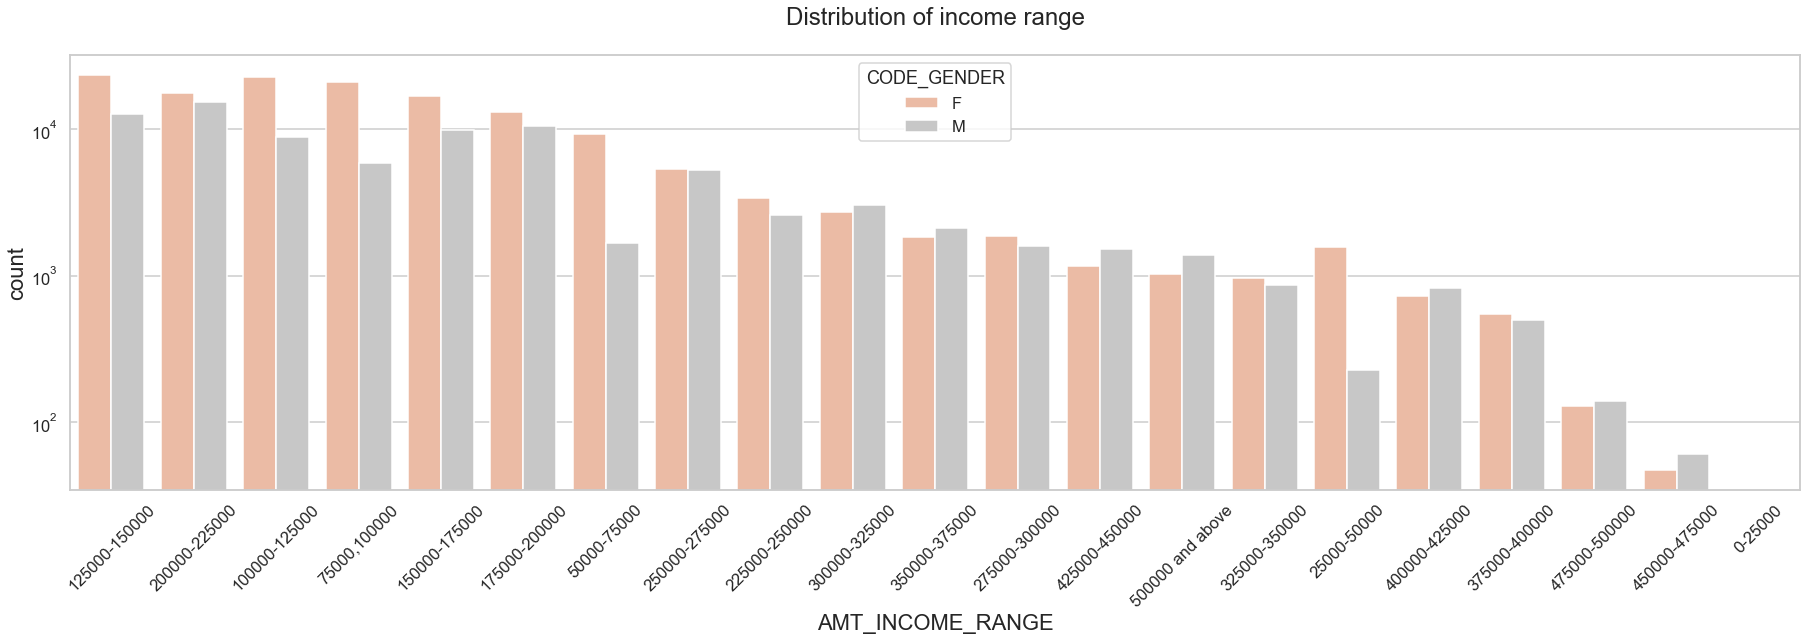

In [58]:
uniplot(p0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

In [ ]:

Points to be concluded from the above graph.

Female counts are higher than male.
Income range from 100000 to 200000 is having more number of credits.
This graph show that females are more than male in having credits for that range.
Very less count for income range 400000 and above.

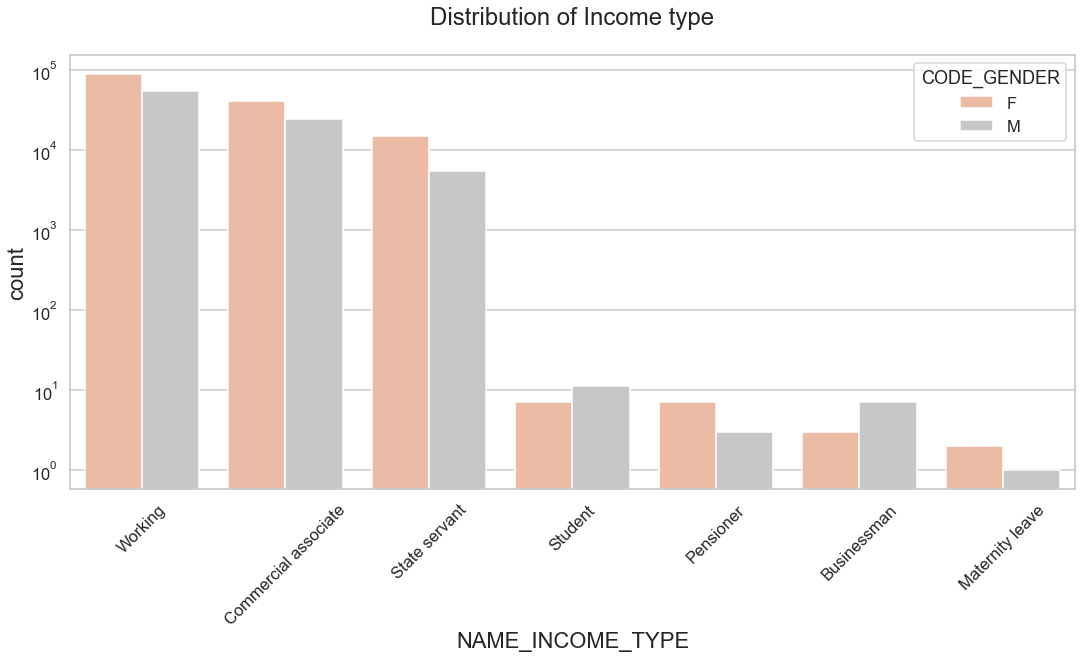

In [60]:
# Plotting for Income type

uniplot(p0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

In [ ]:
Points to be concluded from the above graph.

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
For this Females are having more number of credits than male.
Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

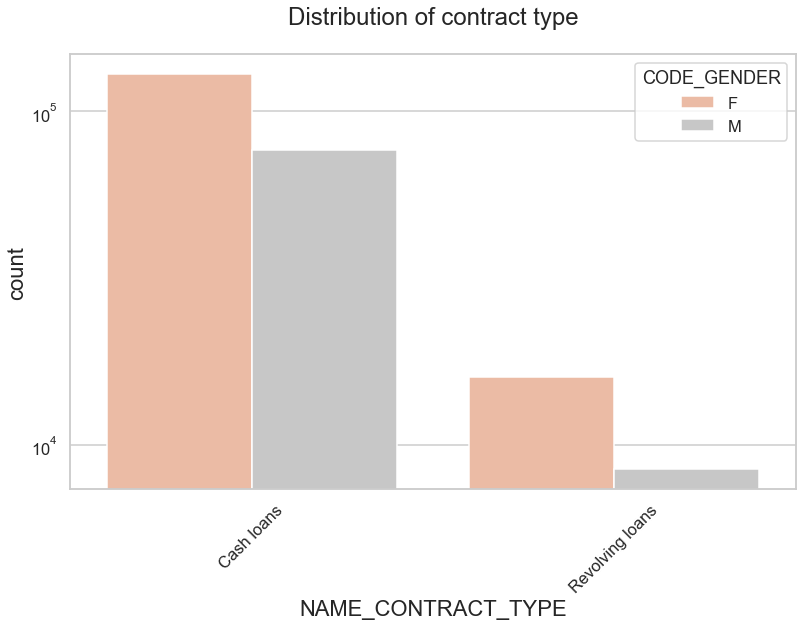

In [62]:
# Plotting for Contract type

uniplot(p0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

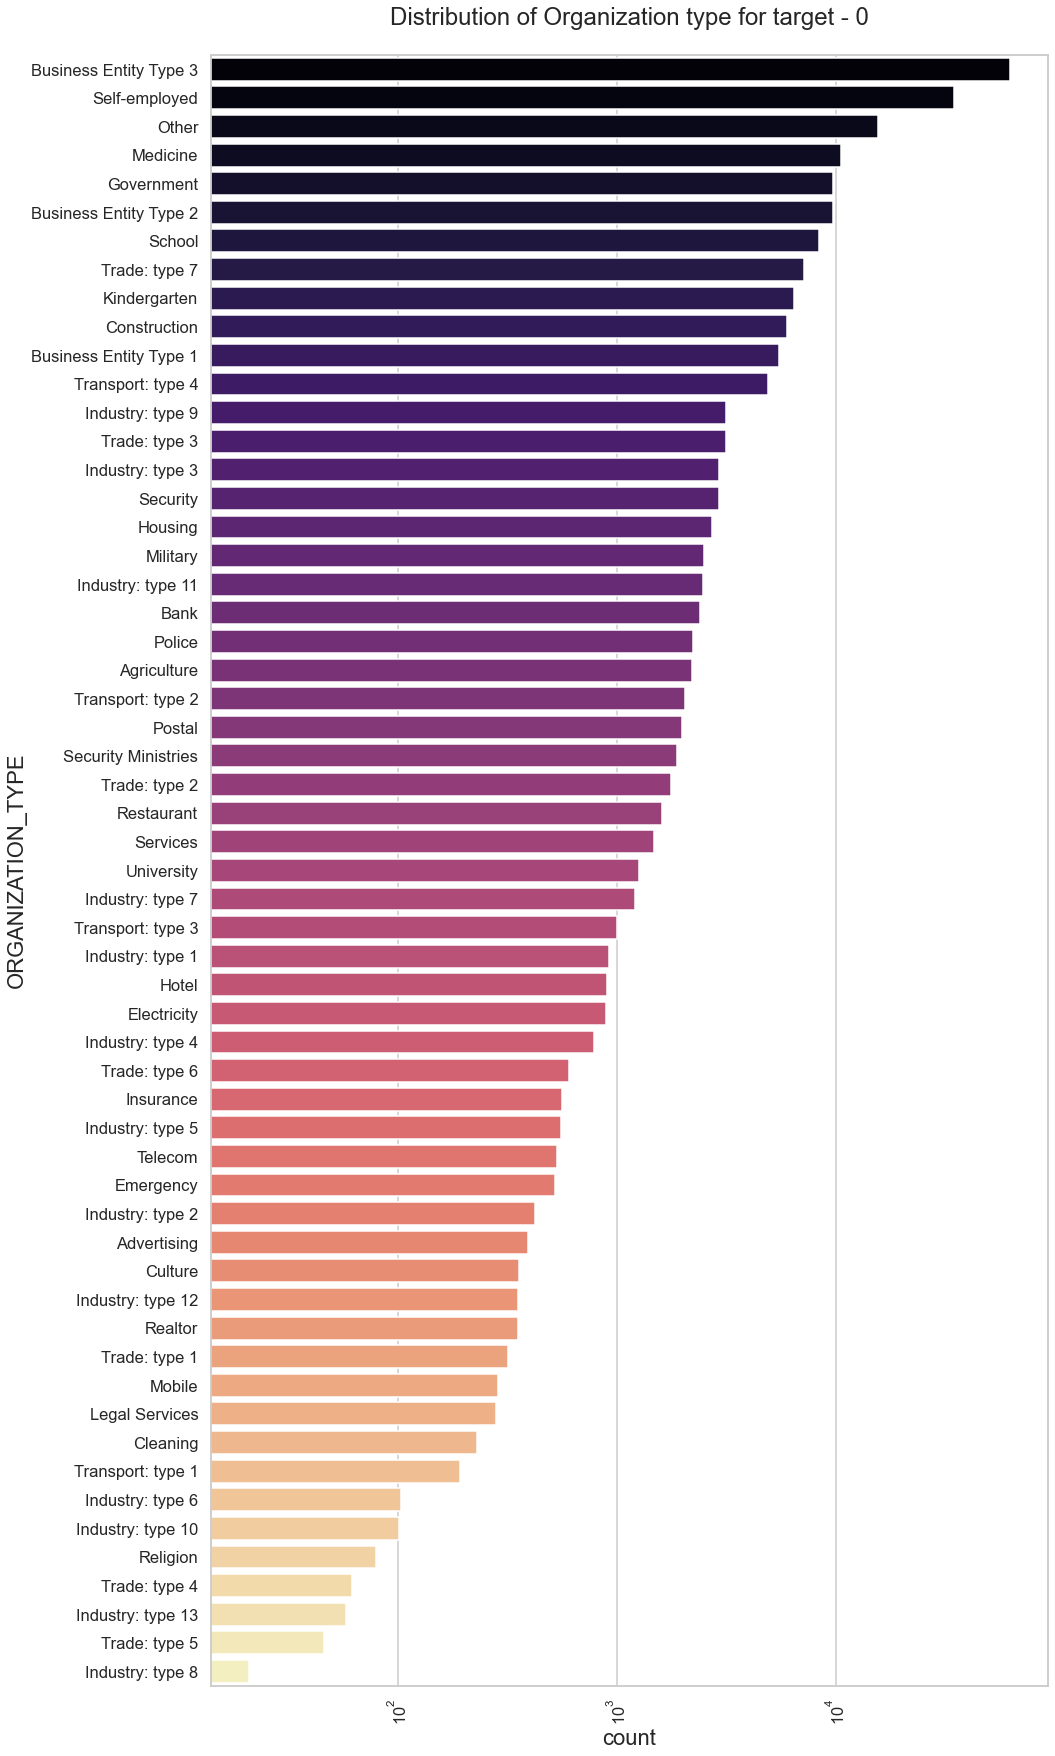

In [67]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=p0_df,y='ORGANIZATION_TYPE',order=p0_df['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

In [ ]:

Points to be concluded from the above graph.
Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)

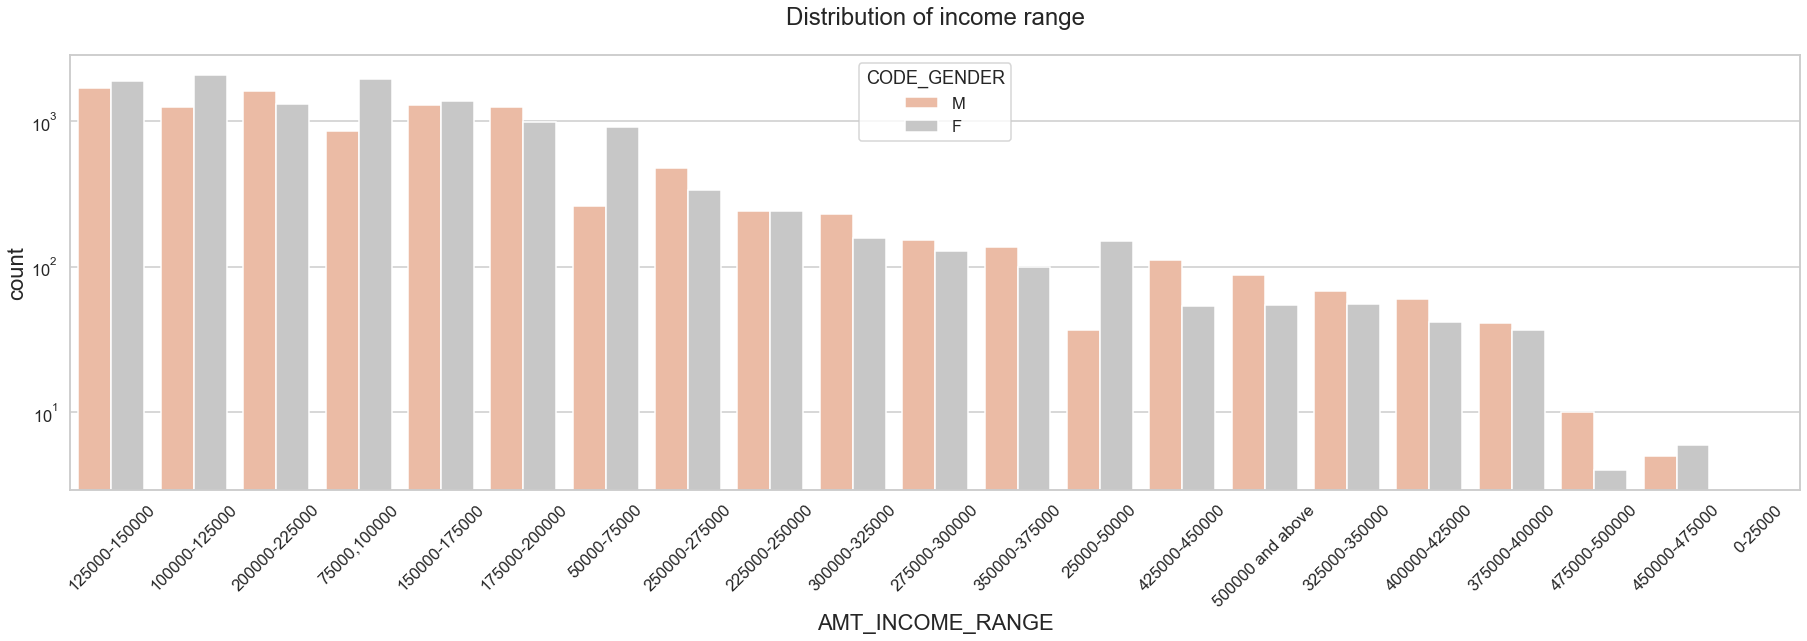

In [69]:
# PLotting for income range

uniplot(p1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

In [ ]:

Points to be concluded from the above graph.

Male counts are higher than female.
Income range from 100000 to 200000 is having more number of credits.
This graph show that males are more than female in having credits for that range.
Very less count for income range 400000 and above.

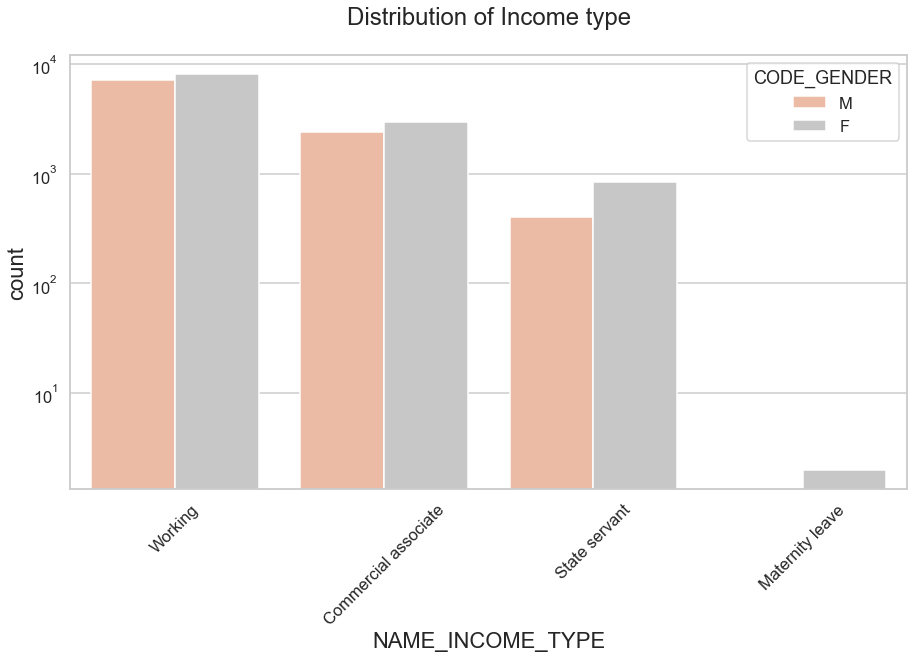

In [70]:
uniplot(p1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

In [ ]:
Points to be concluded from the above graph.

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
For this Females are having more number of credits than male.
Less number of credits for income type ‘Maternity leave’.
For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

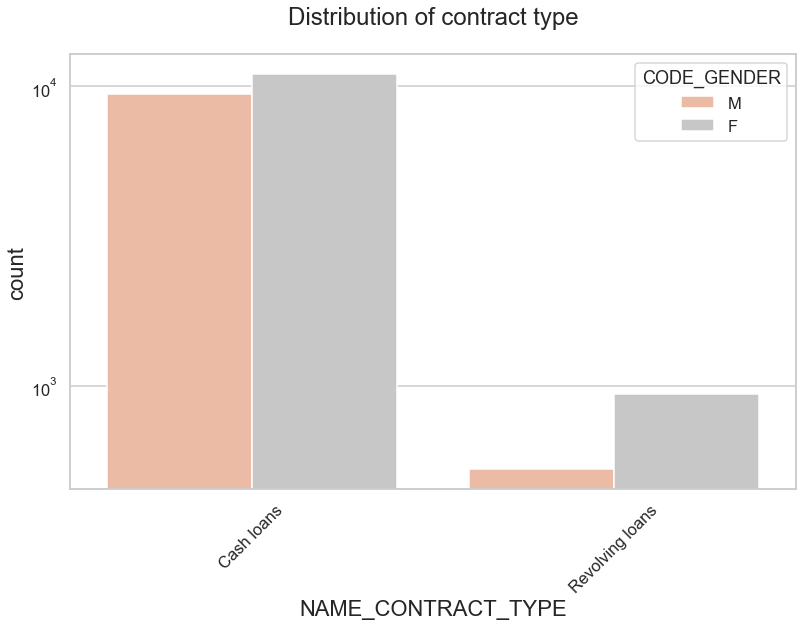

In [71]:
uniplot(p1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

In [ ]:

Points to be concluded from the above graph.

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits.
For type 1 : there is only Female Revolving loans.

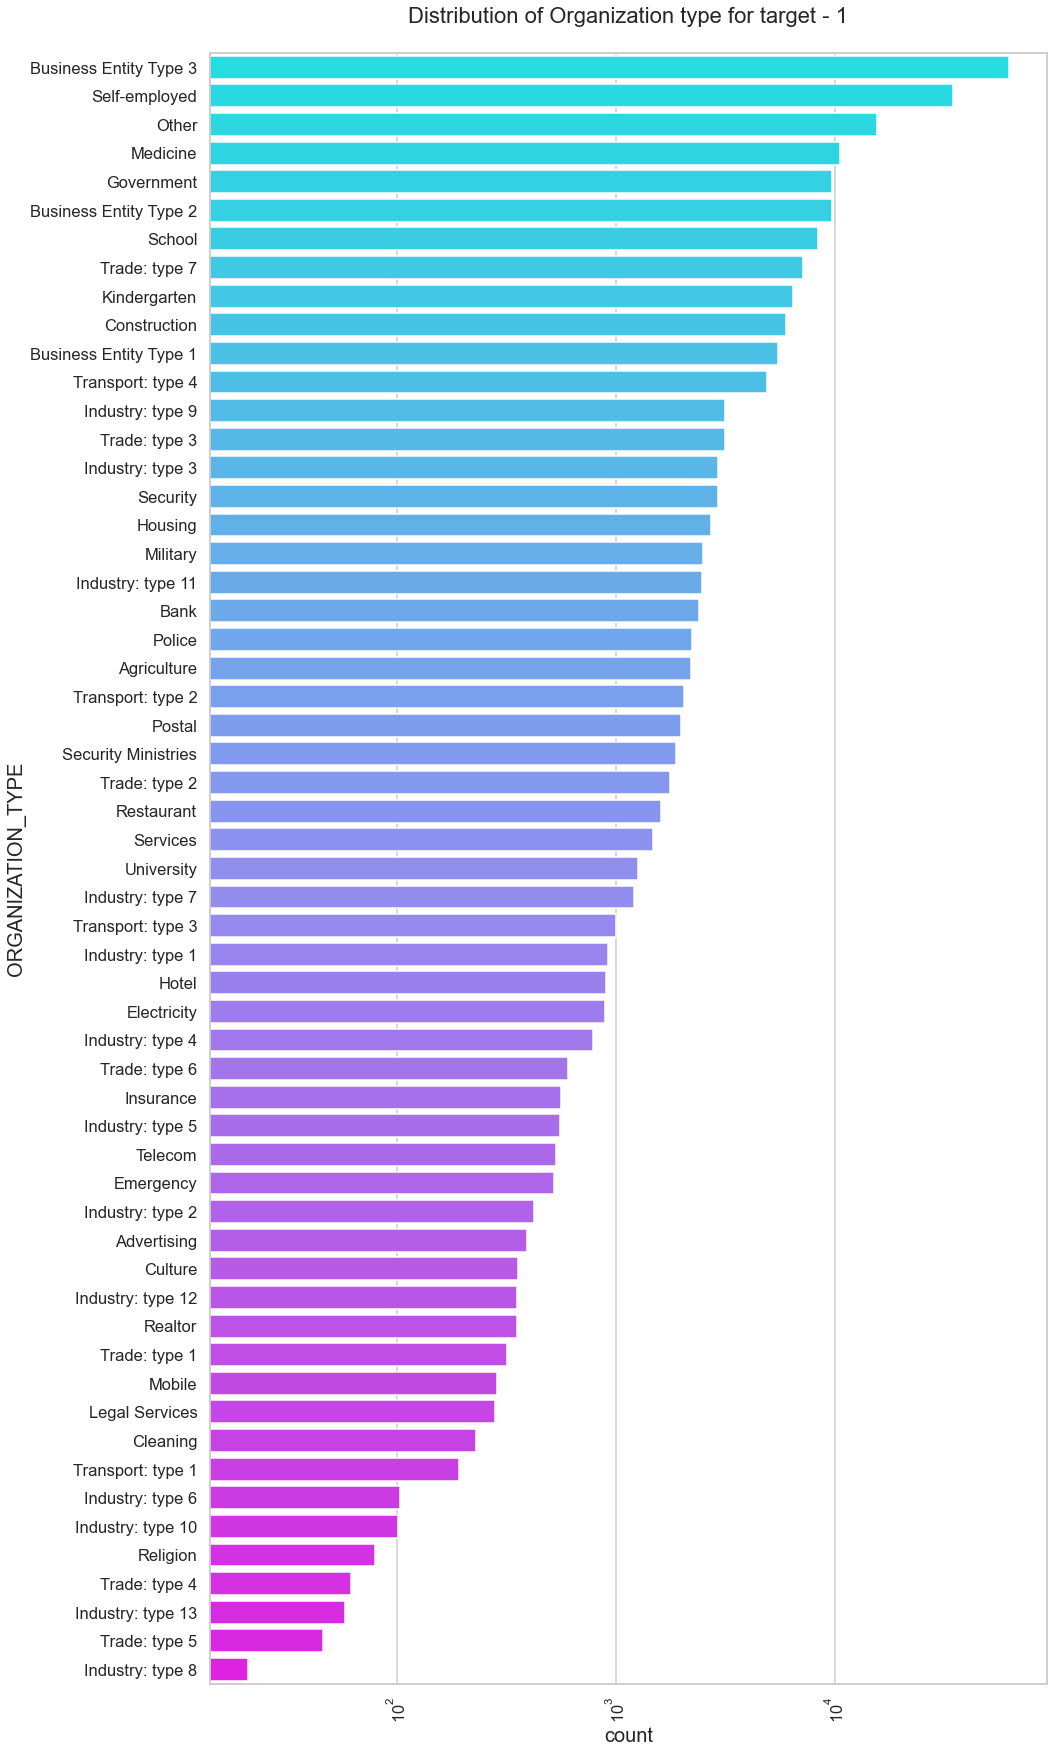

In [73]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=p0_df,y='ORGANIZATION_TYPE',order=p0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

In [ ]:

Points to be concluded from the above graph.

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Same as type 0 in distribution of organization type.

In [74]:
p0_corr=p0_df.iloc[0:,2:]
p1_corr=p1_df.iloc[0:,2:]

p0=p0_corr.corr(method='spearman')
p1=p1_corr.corr(method='spearman')

In [76]:
# Correlation for target 0

p0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                   -0.010795                   -0.030579   
AMT_INCOME_TOTAL                0.472204                    0.110074   
AMT_CREDIT                      0.826689                    0.060706   
AMT_ANNUITY                     1.000000                    0.064328   
REGION_POPULATION_RELATIVE      0.064328                    1.000000   
DAYS_BIRTH                     -0.100287                   -0.041663   
DAYS_EMPLOYED                  -0.074643                    0.000900   
DAYS_REGISTRATION               0.010712                   -0.042400   
DAYS_ID_PUBLISH                -0.027354                   -0.010299   
HOUR_APPR_PROCESS_START         0.032953                    0.133213   
REG_REGION_NOT_LIVE_REGION      0.033435                   -0.025292   
REG_REGION_NOT_WORK_REGION      0.070841                    0.032446   
LIVE_REGION_NOT_WORK_REGION     0.069051                    0.056814   
REG_CITY_NOT_LIVE_CITY         -0.019954                   -0.049779   
REG_CITY_NOT_WORK_CITY         -0.024085                   -0.034808   
LIVE_CITY_NOT_WORK_CITY        -0.008087                   -0.007332   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.266534       0.030948           0.155518   
AMT_INCOME_TOTAL              -0.054666      -0.060868           0.040559   
AMT_CREDIT                    -0.169030      -0.104251          -0.015318   
AMT_ANNUITY                   -0.100287      -0.074643           0.010712   
REGION_POPULATION_RELATIVE    -0.041663       0.000900          -0.042400   
DAYS_BIRTH                     1.000000       0.307787           0.265449   
DAYS_EMPLOYED                  0.307787       1.000000           0.126708   
DAYS_REGISTRATION              0.265449       0.126708           1.000000   
DAYS_ID_PUBLISH                0.083331       0.106823           0.036788   
HOUR_APPR_PROCESS_START        0.051299       0.026444          -0.029553   
REG_REGION_NOT_LIVE_REGION     0.058627       0.065435           0.017715   
REG_REGION_NOT_WORK_REGION     0.038104       0.086966           0.015092   
LIVE_REGION_NOT_WORK_REGION    0.012789       0.063533           0.007716   
REG_CITY_NOT_LIVE_CITY         0.167477       0.118224           0.038064   
REG_CITY_NOT_WORK_CITY         0.111539       0.125954           0.047339   
LIVE_CITY_NOT_WORK_CITY        0.029007       0.069567           0.027231   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.119164                -0.030162   
AMT_INCOME_TOTAL                   -0.036702                 0.073503   

In [77]:
p1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.015133                   -0.029682   
AMT_INCOME_TOTAL                0.428947                    0.058005   
AMT_CREDIT                      0.812093                    0.043545   
AMT_ANNUITY                     1.000000                    0.028666   
REGION_POPULATION_RELATIVE      0.028666                    1.000000   
DAYS_BIRTH                     -0.100200                   -0.044444   
DAYS_EMPLOYED                  -0.060193                   -0.015246   
DAYS_REGISTRATION               0.019762                   -0.033490   
DAYS_ID_PUBLISH                -0.044128                   -0.017779   
HOUR_APPR_PROCESS_START         0.021129                    0.109400   
REG_REGION_NOT_LIVE_REGION      0.029646                   -0.032702   
REG_REGION_NOT_WORK_REGION      0.060363                   -0.008160   
LIVE_REGION_NOT_WORK_REGION     0.059724                    0.012602   
REG_CITY_NOT_LIVE_CITY         -0.011744                   -0.057239   
REG_CITY_NOT_WORK_CITY         -0.015938                   -0.044761   
LIVE_CITY_NOT_WORK_CITY        -0.003012                   -0.014753   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                   0.175025       0.006823           0.110854   
AMT_INCOME_TOTAL              -0.103026      -0.053798           0.011378   
AMT_CREDIT                    -0.200718      -0.107605          -0.021973   
AMT_ANNUITY                   -0.100200      -0.060193           0.019762   
REGION_POPULATION_RELATIVE    -0.044444      -0.015246          -0.033490   
DAYS_BIRTH                     1.000000       0.256870           0.192350   
DAYS_EMPLOYED                  0.256870       1.000000           0.086286   
DAYS_REGISTRATION              0.192350       0.086286           1.000000   
DAYS_ID_PUBLISH                0.146246       0.104244           0.061563   
HOUR_APPR_PROCESS_START        0.041994       0.010328          -0.044753   
REG_REGION_NOT_LIVE_REGION     0.046320       0.069566           0.006362   
REG_REGION_NOT_WORK_REGION     0.022208       0.082264           0.000896   
LIVE_REGION_NOT_WORK_REGION    0.000356       0.056081          -0.001416   
REG_CITY_NOT_LIVE_CITY         0.145884       0.118869           0.015831   
REG_CITY_NOT_WORK_CITY         0.096181       0.139863           0.039204   
LIVE_CITY_NOT_WORK_CITY        0.009633       0.069316           0.026105   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                       -0.091042                -0.040338   
AMT_INCOME_TOTAL                   -0.051113                 0.078779   

In [78]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

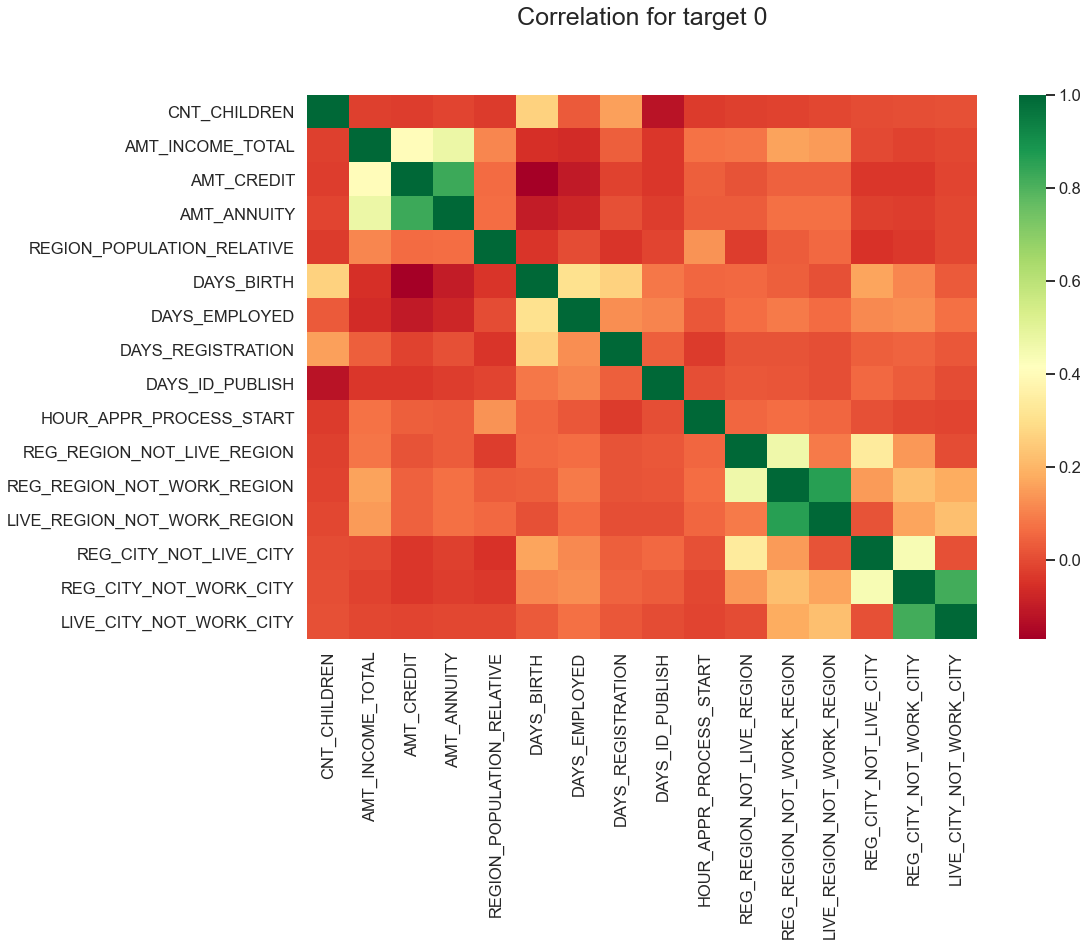

In [80]:

# For Target 0

targets_corr(data=p0,title='Correlation for target 0')

In [ ]:
As we can see from above correlation heatmap, There are number of observation we can point out

Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
less children client have in densely populated area.
Credit amount is higher to densely populated area.
The income is also higher in densely populated area.

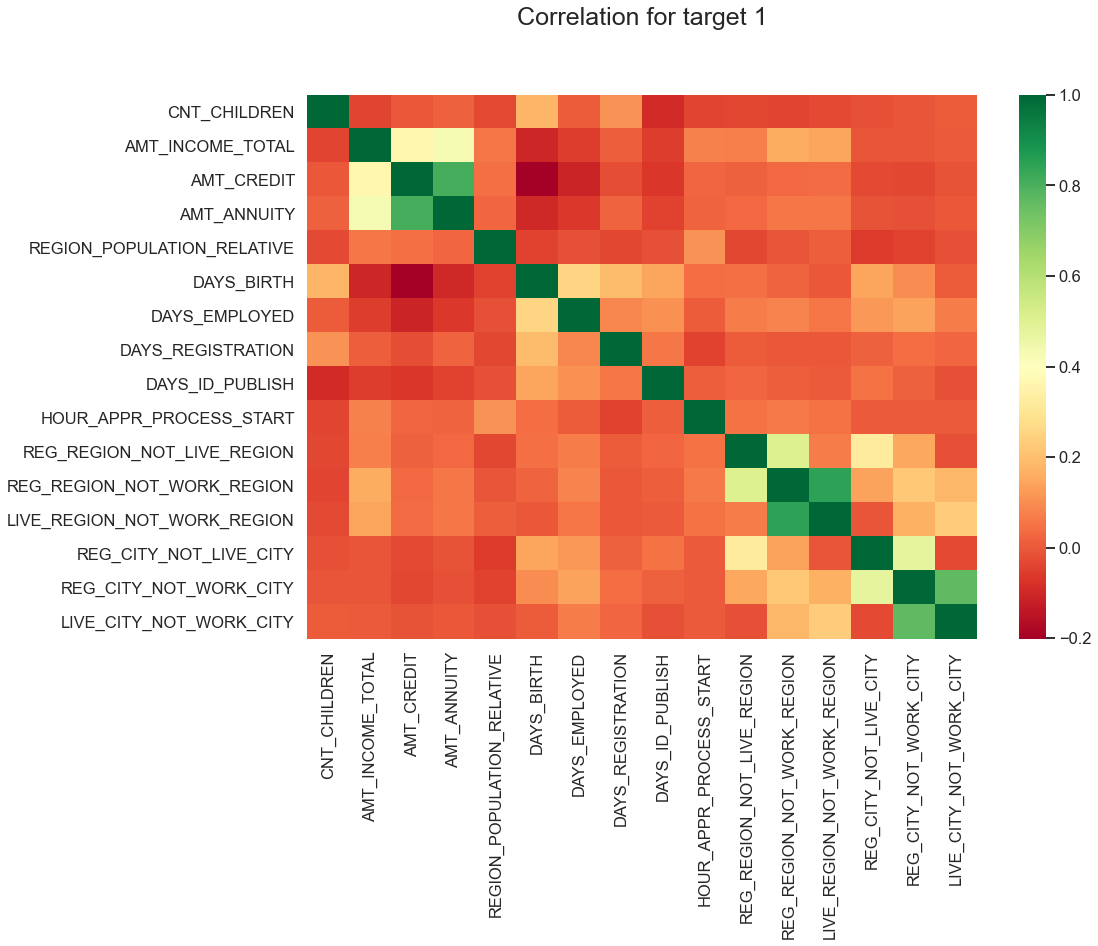

In [81]:
targets_corr(data=p1,title='Correlation for target 1')

In [ ]:

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa
the client's permanent address does not match work address are having less children and vice-versa

In [82]:
def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =p1_df, x=col,orient='v')
    plt.show()

In [84]:
For Target 0 - Finding any outliers

SyntaxError: invalid syntax (<ipython-input-84-d3040053c817>, line 1)

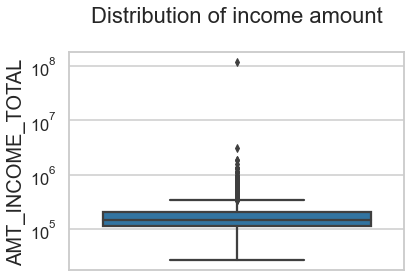

In [83]:
univariate_numerical(data=p0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

In [ ]:

Few points can be concluded from the graph above.

Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.

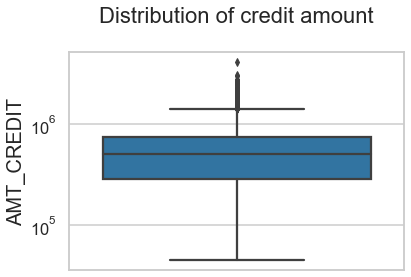

In [85]:
# Disrtibution of credit amount

univariate_numerical(data=p0_df,col='AMT_CREDIT',title='Distribution of credit amount')

In [ ]:

Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

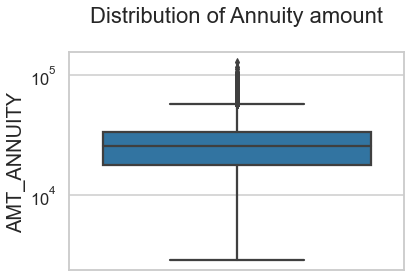

In [86]:
univariate_numerical(data=p0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

In [ ]:

Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

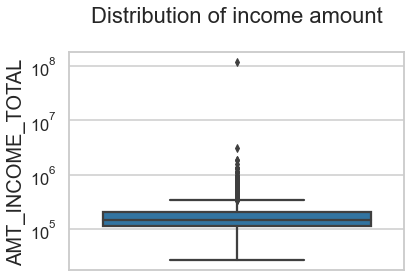

In [88]:

#For Target 1 - Finding any outliers
# Distribution of income amount

univariate_numerical(data=p1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

In [ ]:
Few points can be concluded from the graph above.

Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.
Most of the clients of income are present in first quartile.

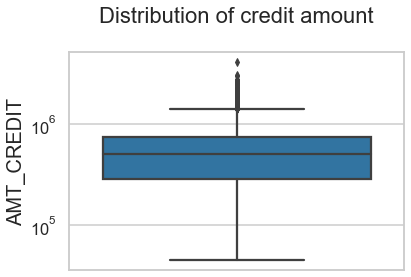

In [89]:
# Distribution of credit amount

univariate_numerical(data=p1_df,col='AMT_CREDIT',title='Distribution of credit amount')

In [ ]:

Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

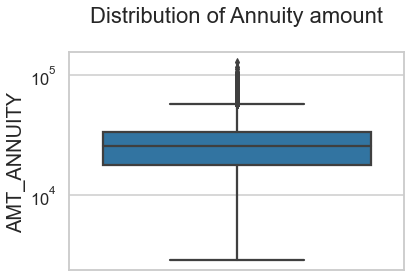

In [90]:

# Distribution of Annuity amount

univariate_numerical(data=p1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

In [ ]:

Few points can be concluded from the graph above.

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.
Bivariate analysis for numerical variables

For Target 0

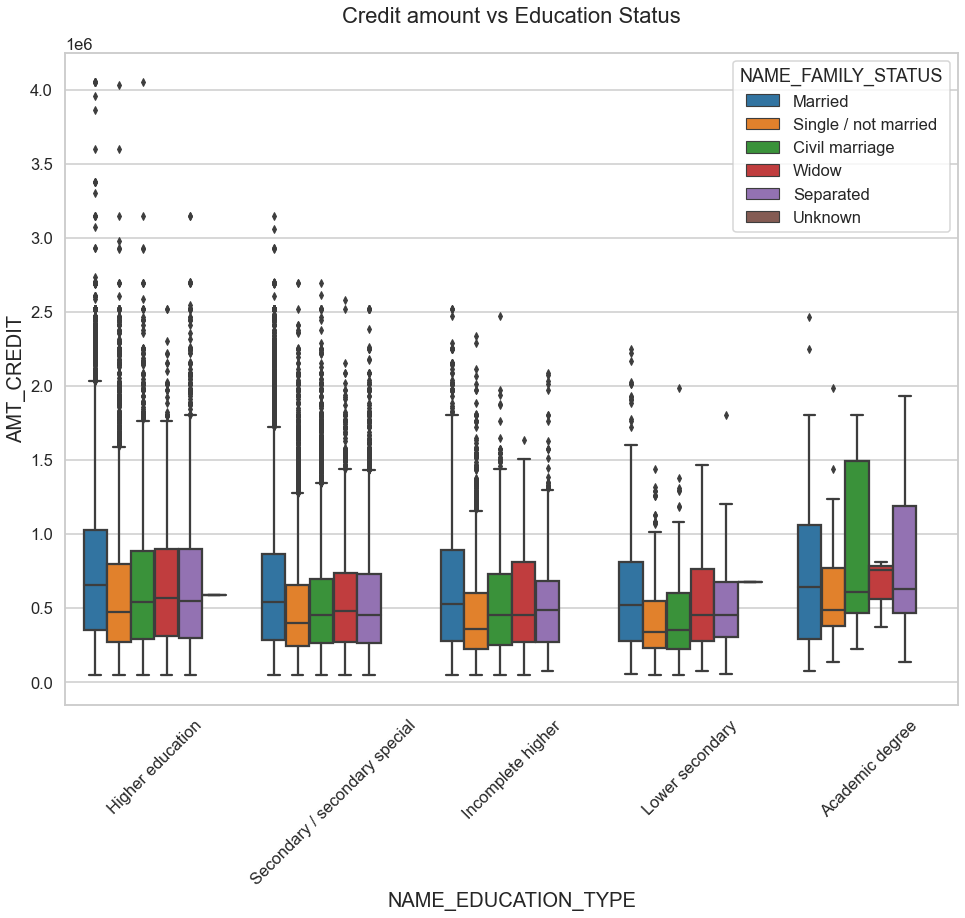

In [91]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =p0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

In [ ]:
From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

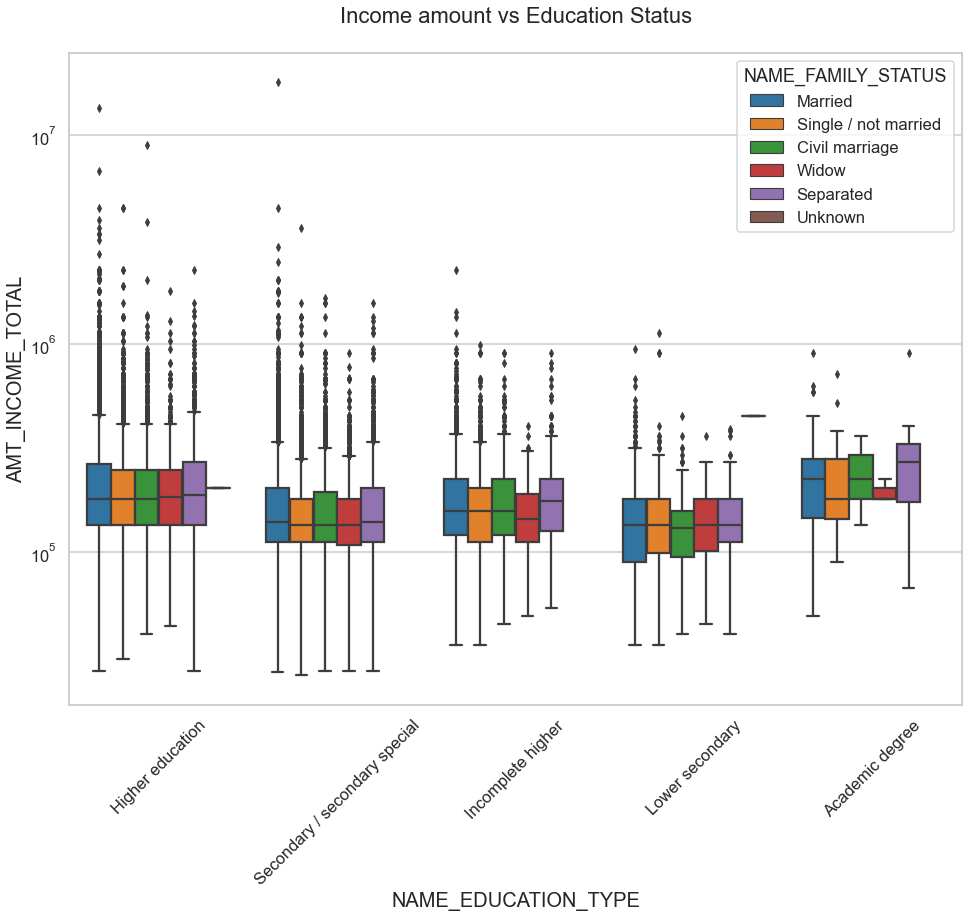

In [93]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =p0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In [ ]:

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

For Target 1

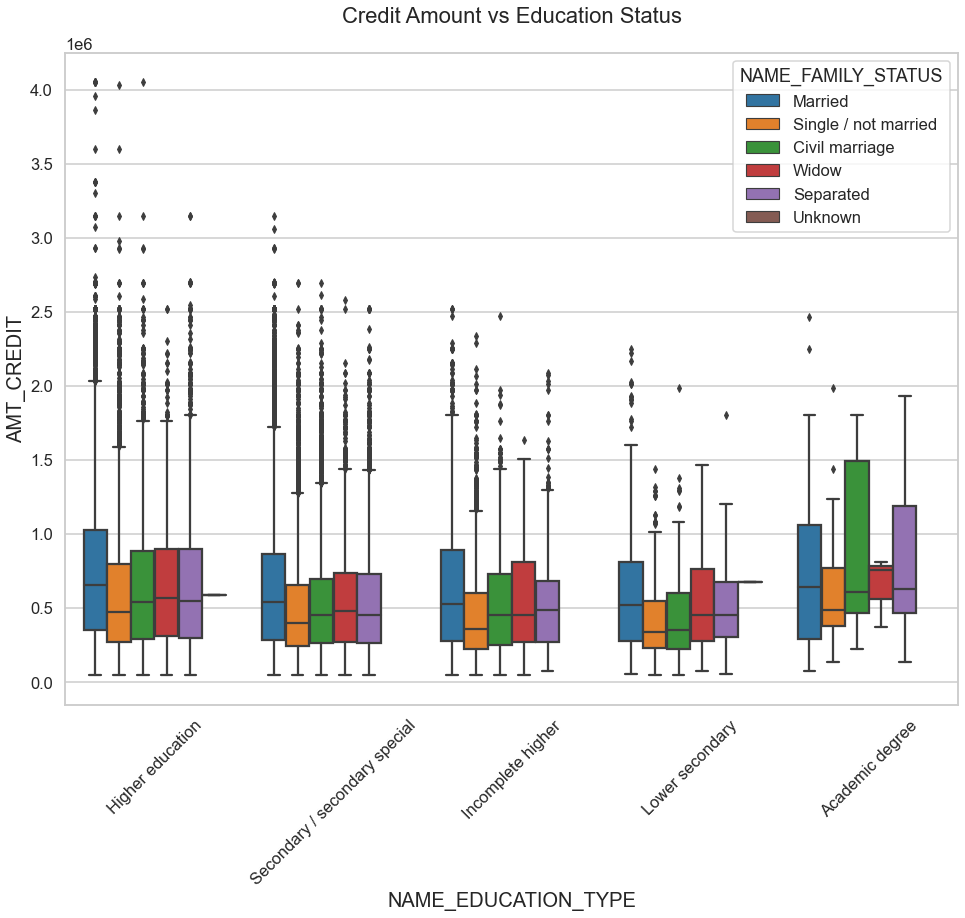

In [94]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =p0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

In [ ]:



Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

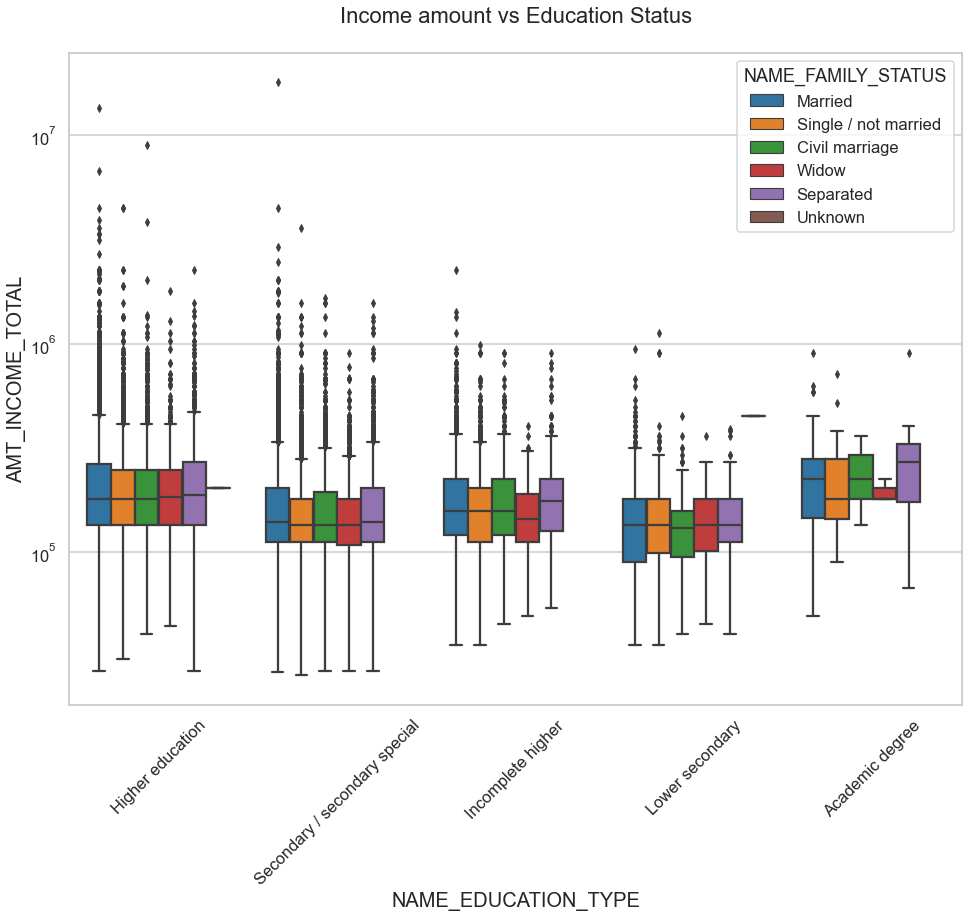

In [99]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =p0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In [ ]:

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.


In [18]:
# Reading the dataset of previous application
df1=pd.read_csv(r"C:\Users\JARVIS\Downloads\Telegram Desktop\CLT+Demo+Files\previous_application.csv")

In [158]:
# Cleaning the missing data

# listing the null values columns having more than 30%

In [19]:
vaccol1=df1.isnull().sum()
vaccol1=vaccol1[vaccol1.values>(0.3*len(vaccol1))]
len(vaccol1)

16

In [20]:
df1.head(0)

Empty DataFrame
Columns: [Unnamed: 0, SK_ID_PREV_, SK_ID_CURR, NAME_CONTRACT_TYPE_, AMT_ANNUITY, AMT_APPLICATION_, AMT_CREDIT_, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START_, HOUR_APPR_PROCESS_START_, FLAG_LAST_APPL_PER_CONTRACT_, NFLAG_LAST_APPL_IN_DAY_, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE_, NAME_CONTRACT_STATUS_, DAYS_DECISION_, NAME_PAYMENT_TYPE_, CODE_REJECT_REASON_, NAME_TYPE_SUITE, NAME_CLIENT_TYPE_, NAME_GOODS_CATEGORY_, NAME_PORTFOLIO_, NAME_PRODUCT_TYPE_, CHANNEL_TYPE_, SELLERPLACE_AREA_, NAME_SELLER_INDUSTRY_, CNT_PAYMENT, NAME_YIELD_GROUP_, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL, SK_ID_PREVx, NAME_CONTRACT_TYPEx, AMT_APPLICATIONx, AMT_CREDITx, WEEKDAY_APPR_PROCESS_STARTx, HOUR_APPR_PROCESS_STARTx, FLAG_LAST_APPL_PER_CONTRACTx, NFLAG_LAST_APPL_IN_DAYx, NAME_CASH_LOAN_PURPOSEx, NAME_CONTRACT_STATUSx, DAYS_DECISIONx, NAME_PAYMENT_TYPEx, CODE_REJECT_REASONx, NAME_CLIENT_TYPEx, NAME_GOODS_CATEGORYx, NAME_PORTFOLIOx, NAME_PRODUCT_TYPEx, CHANNEL_TYPEx, SELLERPLACE_AREAx, NAME_SELLER_INDUSTRYx, NAME_YIELD_GROUPx, TARGET]
Index: []

[0 rows x 60 columns]

In [21]:
df1.describe()

Unnamed: 0   SK_ID_PREV_     SK_ID_CURR    AMT_ANNUITY  \
count  749581.000000  7.495810e+05  749581.000000  555580.000000   
mean   374790.000000  1.934673e+06  278319.816915   20623.572824   
std    216385.540401  5.311683e+05  102712.051037   17012.077496   
min         0.000000  1.000007e+06  100034.000000       0.000000   
25%    187395.000000  1.478976e+06  189536.000000    8848.507500   
50%    374790.000000  1.939167e+06  279264.000000   15928.785000   
75%    562185.000000  2.393659e+06  367791.000000   27346.500000   
max    749580.000000  2.845381e+06  456255.000000  418058.145000   

       AMT_APPLICATION_   AMT_CREDIT_  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      7.495810e+05  7.495790e+05      1.852390e+05     5.495190e+05   
mean       2.545194e+05  2.869388e+05      5.520515e+03     3.472236e+05   
std        4.012454e+05  4.370224e+05      2.230870e+04     4.329468e+05   
min        0.000000e+00  0.000000e+00      0.000000e+00     0.000000e+00   
25%        0.000000e+00  1.551150e+04      0.000000e+00     8.100000e+04   
50%        1.007415e+05  1.203885e+05      0.000000e+00     1.800000e+05   
75%        3.150000e+05  3.636180e+05      5.521500e+03     4.500000e+05   
max        4.140000e+06  4.104351e+06      1.575000e+06     4.140000e+06   

       HOUR_APPR_PROCESS_START_  NFLAG_LAST_APPL_IN_DAY_  ...  \
count             749581.000000            749581.000000  ...   
mean                  12.288609                 0.996466  ...   
std                    3.260168                 0.059342  ...   
min                    0.000000                 0.000000  ...   
25%                   10.000000                 1.000000  ...   
50%                   12.000000                 1.000000  ...   
75%                   15.000000                 1.000000  ...   
max                   23.000000                 1.000000  ...   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL   SK_ID_PREVx  \
count     289797.000000              289797.000000  7.495810e+05   
mean       74008.087075                   0.457869  1.942284e+06   
std       147722.783292                   0.498223  5.291713e+05   
min        -2865.000000                   0.000000  1.000125e+06   
25%        -1161.000000                   0.000000  1.495289e+06   
50%         -506.000000                   0.000000  1.953326e+06   
75%          -93.000000                   1.000000  2.399642e+06   
max       365243.000000                   1.000000  2.845265e+06   

       AMT_APPLICATIONx   AMT_CREDITx  HOUR_APPR_PROCESS_STARTx  \
count      7.495810e+05  7.495810e+05             749581.000000   
mean       4.876860e+05  5.478280e+05                 12.183697   
std        5.128270e+05  5.598456e+05                  3.187872   
min        0.000000e+00  0.000000e+00                  0.000000   
25%        1.350000e+05  1.629675e+05                 10.000000   
50%        3.150000e+05  3.530925e+05                 12.000000   
75%        6.750000e+05  7.444980e+05                 15.000000   
max        4.050000e+06  4.104351e+06                 23.000000   

       NFLAG_LAST_APPL_IN_DAYx  DAYS_DECISIONx  SELLERPLACE_AREAx  \
count            749581.000000   749581.000000      749581.000000   
mean                  0.999210     -634.327891           7.001489   
std                   0.028092      546.027931          94.182794   
min                   0.000000    -2465.000000          -1.000000   
25%                   1.000000     -698.000000          -1.000000   
50%                   1.000000     -479.000000          -1.000000   
75%                   1.000000     -286.000000          -1.000000   
max                   1.000000       -2.000000       12102.000000   

              TARGET  
count  307511.000000  
mean        0.080729  
std         0.272419  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 30 columns]

In [22]:
vaccol1 = list(vaccol1[vaccol1.values>=0.3].index)
df1.drop(labels=vaccol1,axis=1,inplace=True)

df1.shape

(749581, 44)

In [164]:
df1.NAME_CASH_LOAN_PURPOSE_.value_counts()

XNA                                 328973
XAP                                 227193
Repairs                              68408
Other                                42724
Urgent needs                         21547
Buying a used car                     8636
Building a house or an annex          8539
Medicine                              6022
Payments on other loans               5849
Everyday expenses                     5367
Buying a new car                      3802
Education                             3721
Journey                               3040
Buying a home                         2537
Wedding / gift / holiday              2456
Purchase of electronic equipment      2320
Car repairs                           2045
Furniture                             2034
Buying a holiday home / land          1760
Business development                  1141
Gasification / water supply            833
Buying a garage                        407
Hobby                                  130
Money for a

In [23]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

KeyError: 'NAME_CASH_LOAN_PURPOSE'

In [24]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [17]:
new_df = new_df.to_csv('filename.csv')
new_df2 = pd.read_csv(r"C:\Users\JARVIS\Downloads\filename.csv")

NameError: name 'new_df' is not defined

In [25]:

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [26]:
new_df1=new_df1.drop(new_df1[new_df1['NAME_CASH_LOAN_PURPOSE_']=='XNA'].index)
new_df1=new_df1.drop(new_df1[new_df1['NAME_CASH_LOAN_PURPOSE_']=='XNA'].index)
new_df1=new_df1.drop(new_df1[new_df1['NAME_CASH_LOAN_PURPOSE_']=='XAP'].index)

In [27]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION_', 
              'REG_REGION_NOT_WORK_REGION_','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

KeyError: "['SK_ID_CURR' 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'\n 'REG_REGION_NOT_LIVE_REGION_' 'REG_REGION_NOT_WORK_REGION_'\n 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'\n 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY'\n 'WEEKDAY_APPR_PROCESS_START_PREV' 'HOUR_APPR_PROCESS_START_PREV'\n 'FLAG_LAST_APPL_PER_CONTRACT' 'NFLAG_LAST_APPL_IN_DAY'] not found in axis"

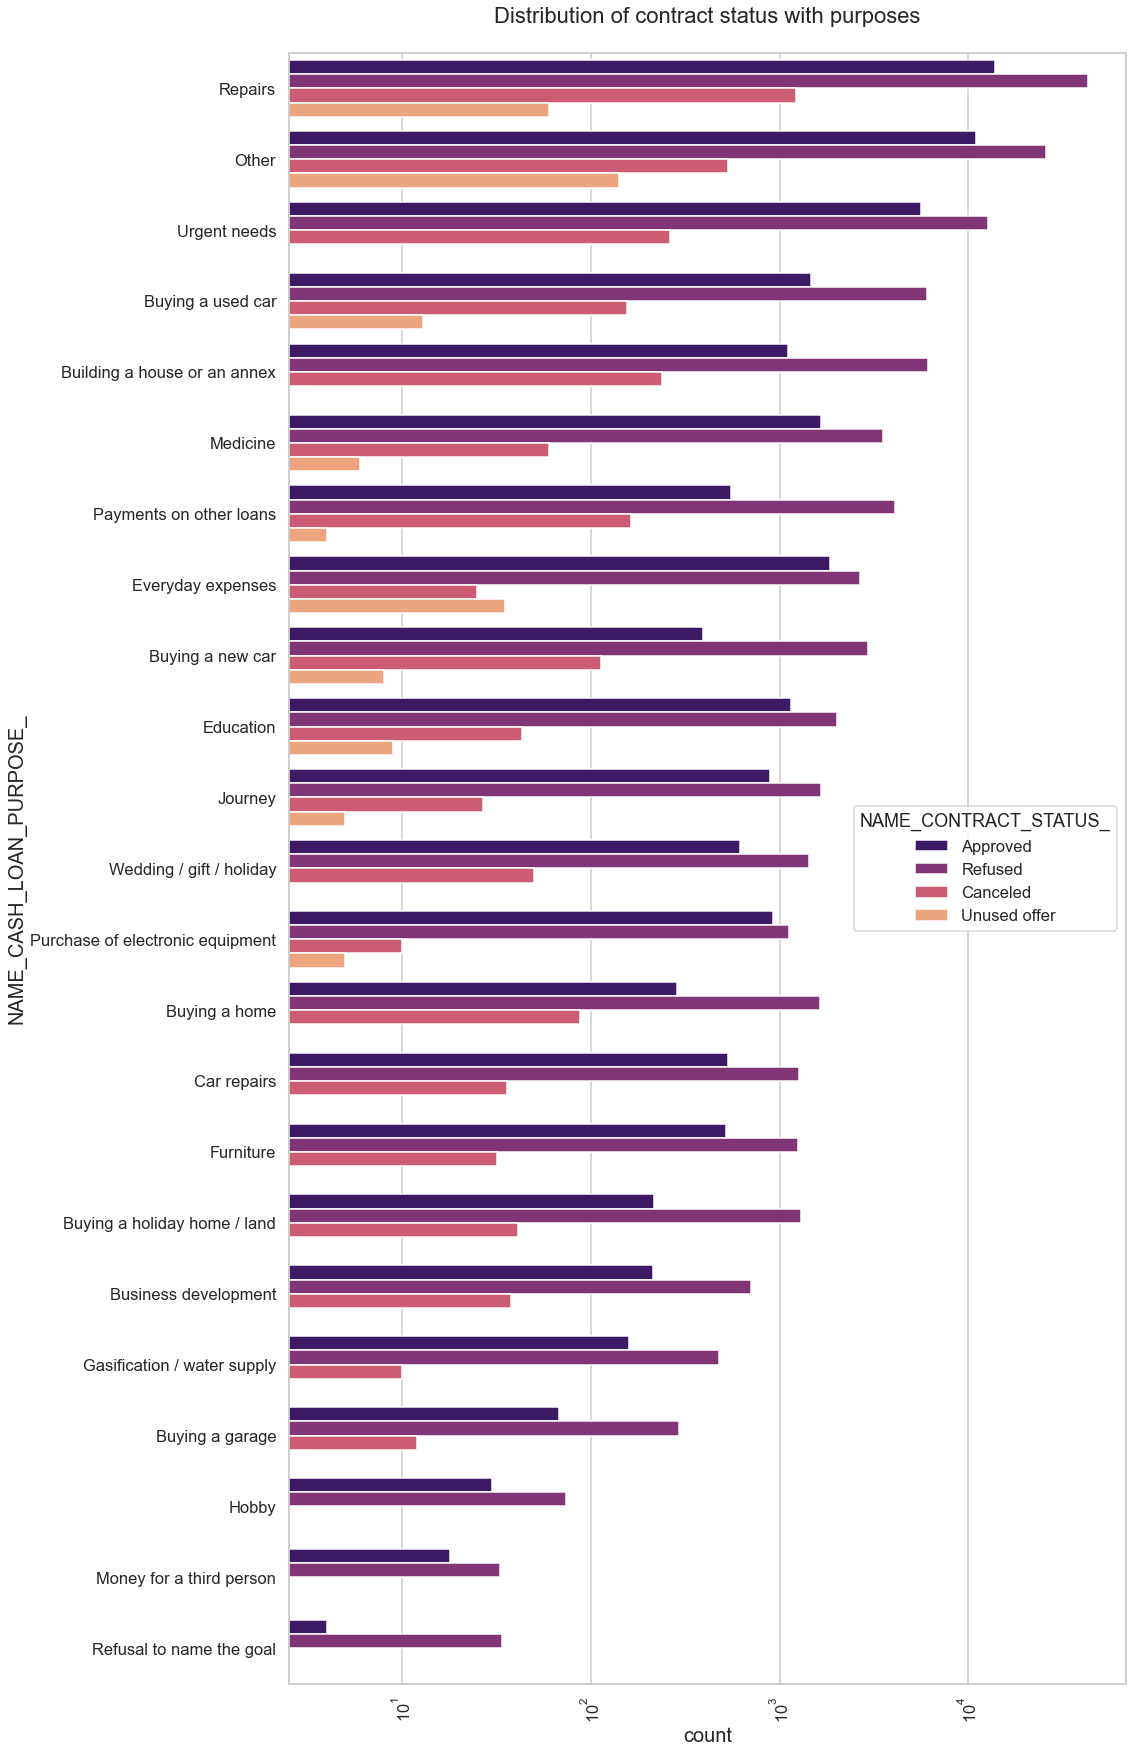

In [28]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE_', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE_'].value_counts().index,hue = 'NAME_CONTRACT_STATUS_',palette='magma')

In [ ]:

Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Payign other loans and buying a new car is having significant higher rejection than approves.

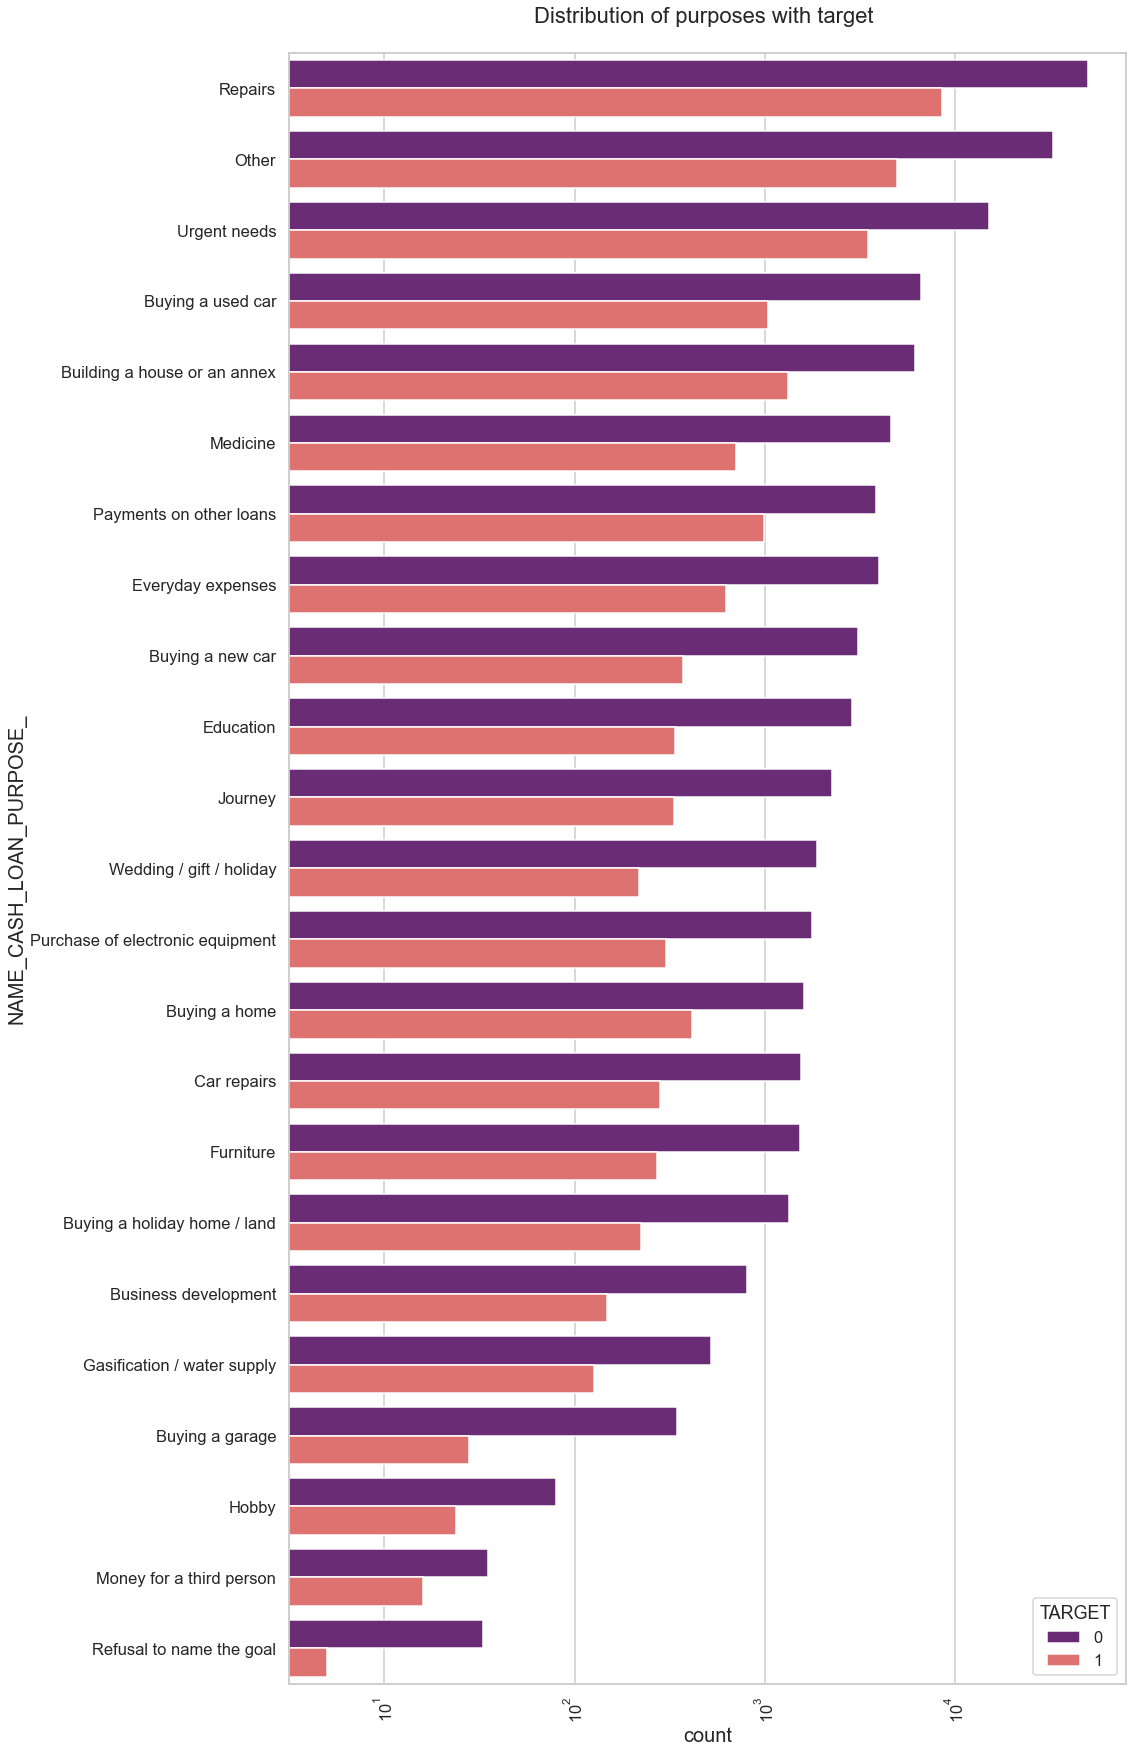

In [29]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE_', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE_'].value_counts().index,hue = 'TARGET',palette='magma')


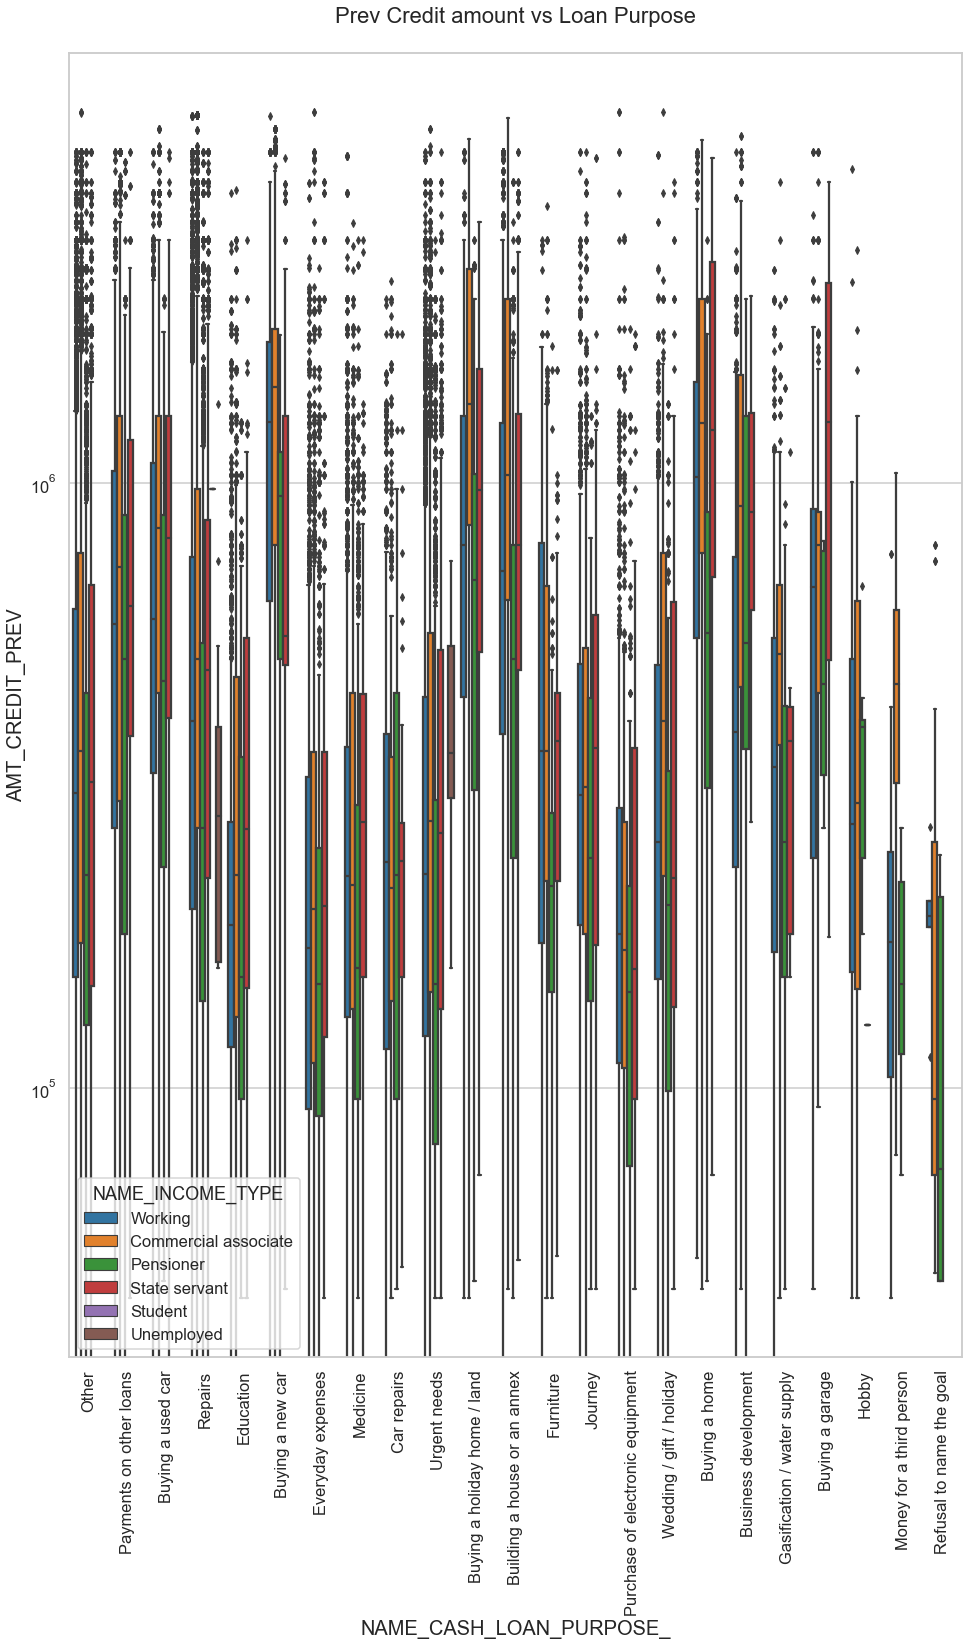

In [31]:
plt.figure(figsize=(16,24))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE_',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [ ]:

From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

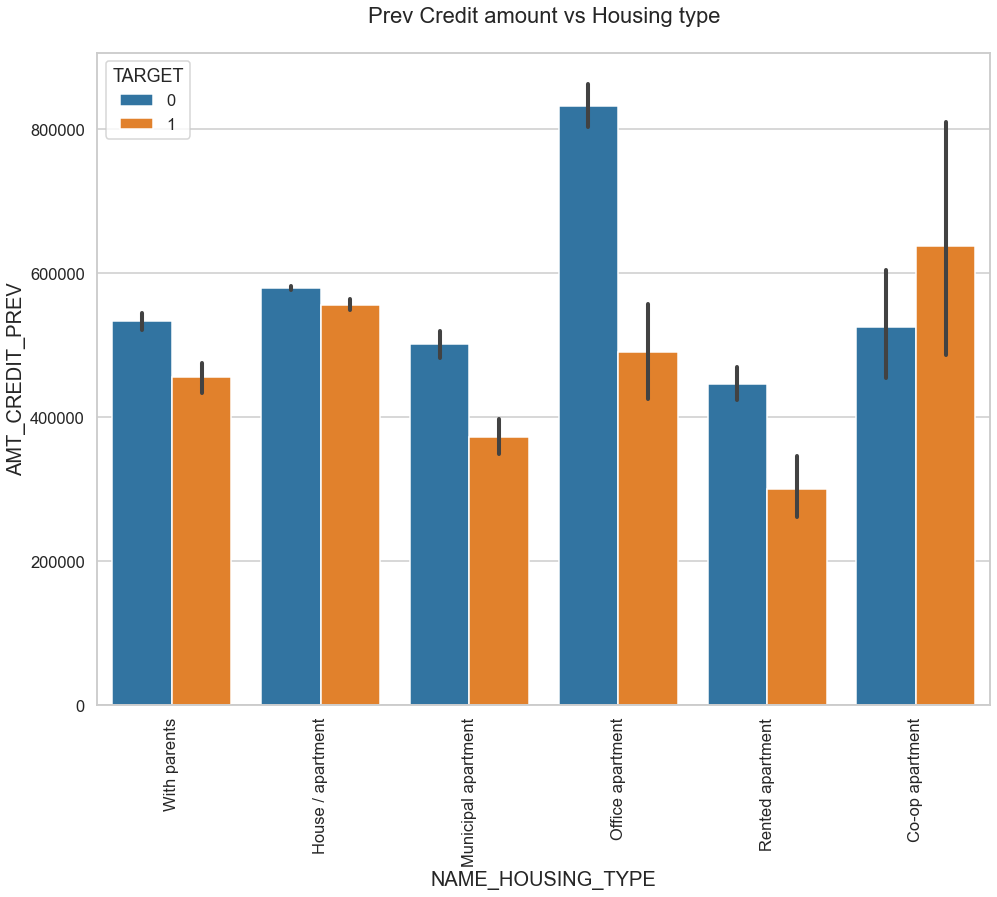

In [32]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

In [ ]:

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

In [ ]:

CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.